In [1]:
print('''
Initial data exploration for general trends. 
''')


Initial data exploration for general trends. 



In [2]:
print('''Exploratory data analysis''')

Exploratory data analysis


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# plotting-- for future use
plt.style.use('default')
sns.set_palette("husl")

# loading
df_clean = pd.read_parquet('../data/processed/cleaned_citibike_data.parquet')

# check for correct load
print(f"Data shape: {df_clean.shape}")
# print(df_clean.head())

Data shape: (3209060, 13)


In [4]:
# overview data

# column names for reference
print("Column names:")
print(df_clean.columns.tolist())

# review. correct data types next if necessary.
print("\nData types:")
print(df_clean.dtypes)

# determine if these are necessary to keep for analytics-- volume, granularity
print("\nMissing values:")
print(df_clean.isnull().sum())

Column names:
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']

Data types:
ride_id                       object
rideable_type         string[python]
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name    string[python]
start_station_id              object
end_station_name      string[python]
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual         string[python]
dtype: object

Missing values:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat              

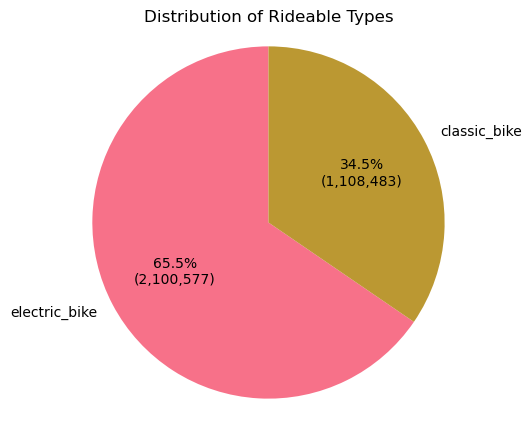

In [5]:
# distribution of ride types with counts

# plot parameters
plt.figure(figsize=(5, 5))
rideable_counts = df_clean['rideable_type'].value_counts()

# counts and percent for visual
def make_visual(values):
    def value_percent(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})'
    return value_percent

# visual aesthetics
plt.pie(rideable_counts.values, 
        labels=rideable_counts.index, 
        autopct=make_visual(rideable_counts.values),
        startangle=90)
plt.title('Distribution of Rideable Types')
plt.axis('equal')
plt.show()

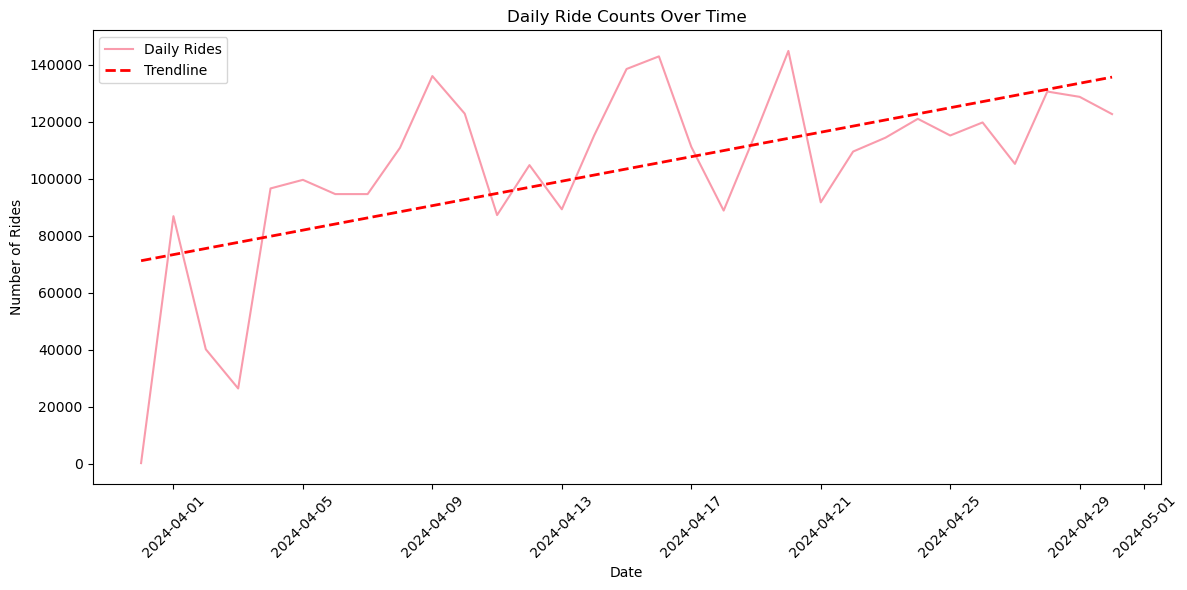

In [6]:
# daily ride counts over time

# date column for grouping
df_clean['date'] = df_clean['started_at'].dt.date
daily_rides = df_clean.groupby('date').size()

# visual plot parameters
plt.figure(figsize=(12, 6))
daily_rides.plot(label='Daily Rides', alpha=0.7)

# values for linear regression
x_numeric = range(len(daily_rides))
y_values = daily_rides.values

# linear regression
z = np.polyfit(x_numeric, y_values, 1)
p = np.poly1d(z)

# trendline
plt.plot(daily_rides.index, p(x_numeric), "r--", linewidth=2, label='Trendline')

# visual aesthetics
plt.title('Daily Ride Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

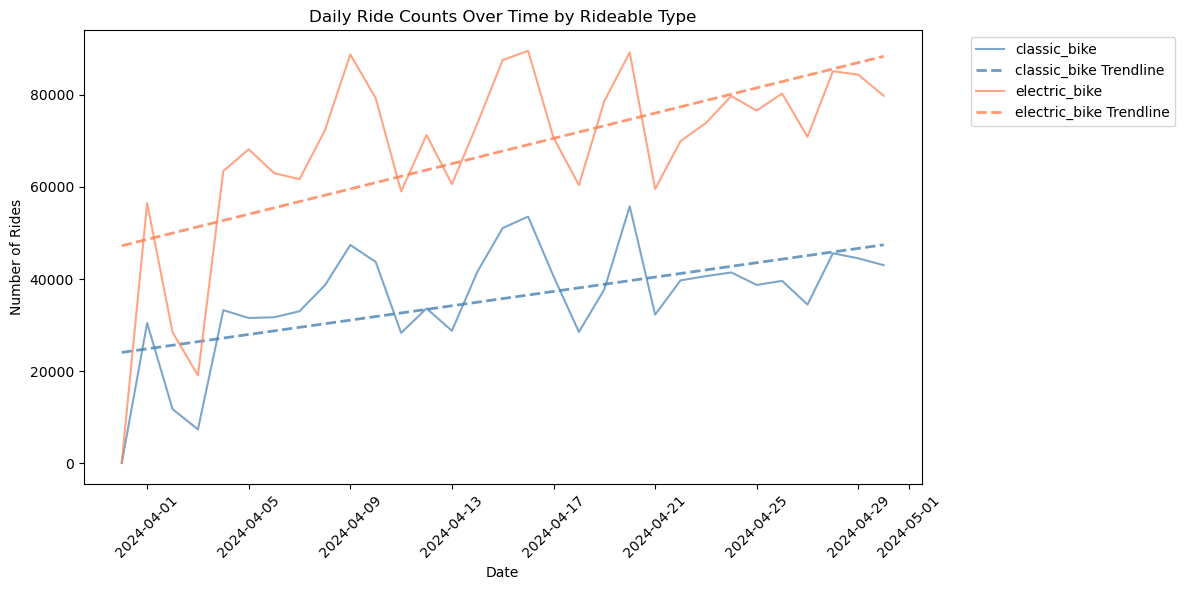

In [7]:
# daily ride counts over time by rideable type

# group by date and rideable type
daily_rides_by_type = df_clean.groupby(['date', 'rideable_type']).size().unstack(fill_value=0)

# visual plot parameters
plt.figure(figsize=(12, 6))

# plot each rideable type
colors = ['steelblue', 'coral', 'lightgreen', 'gold']  # adjust colors here 
for i, rideable_type in enumerate(daily_rides_by_type.columns):
    daily_rides_by_type[rideable_type].plot(
        label=f'{rideable_type}', 
        alpha=0.7, 
        color=colors[i % len(colors)]
    )
    
    # trendline for each rideable type
    x_numeric = range(len(daily_rides_by_type))
    y_values = daily_rides_by_type[rideable_type].values
    
    # linear regression
    z = np.polyfit(x_numeric, y_values, 1)
    p = np.poly1d(z)
    
    # trendline
    plt.plot(daily_rides_by_type.index, p(x_numeric), 
             linestyle='--', linewidth=2, color=colors[i % len(colors)], 
             alpha=0.8, label=f'{rideable_type} Trendline')

# visual aesthetics
plt.title('Daily Ride Counts Over Time by Rideable Type')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


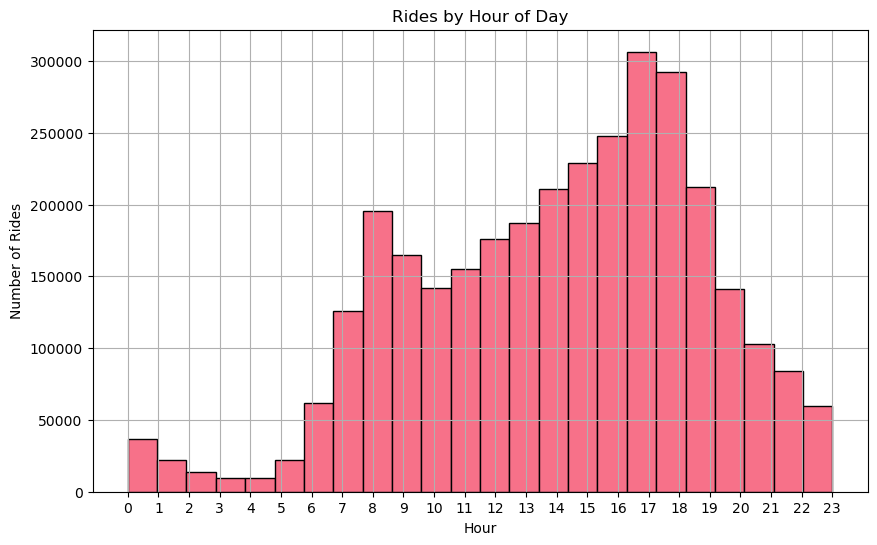

In [8]:
# rides by hour of day

plt.figure(figsize=(10, 6))
df_clean['hour'] = df_clean['started_at'].dt.hour
df_clean['hour'].hist(bins=24, edgecolor='black')
plt.title('Rides by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.show()

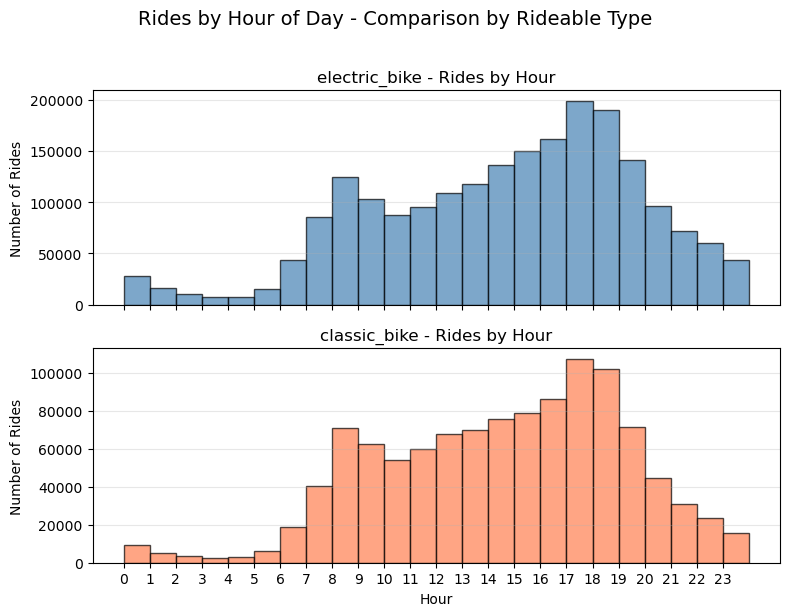

In [9]:
# rides by hour of day by rideable type

# get unique rideable types
rideable_types = df_clean['rideable_type'].unique()
colors = ['steelblue', 'coral', 'lightgreen', 'gold']  # change visual colors here

# separate plots for each rideable type
fig, axes = plt.subplots(len(rideable_types), 1, figsize=(8, 3*len(rideable_types)), sharex=True)

if len(rideable_types) == 1:
    axes = [axes]  # ensure axes is a list

# for every rideable type count the rides by hour of the day
for i, rideable_type in enumerate(rideable_types):
    rideable_data = df_clean[df_clean['rideable_type'] == rideable_type]['hour']
    
    axes[i].hist(rideable_data, 
                 bins=range(0, 25), 
                 color=colors[i % len(colors)], 
                 alpha=0.7,
                 edgecolor='black')
    axes[i].set_title(f'{rideable_type} - Rides by Hour')
    axes[i].set_ylabel('Number of Rides')
    axes[i].set_xticks(range(0, 24))
    axes[i].grid(axis='y', alpha=0.3)

# visual aesthetics
plt.xlabel('Hour')
plt.suptitle('Rides by Hour of Day - Comparison by Rideable Type', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


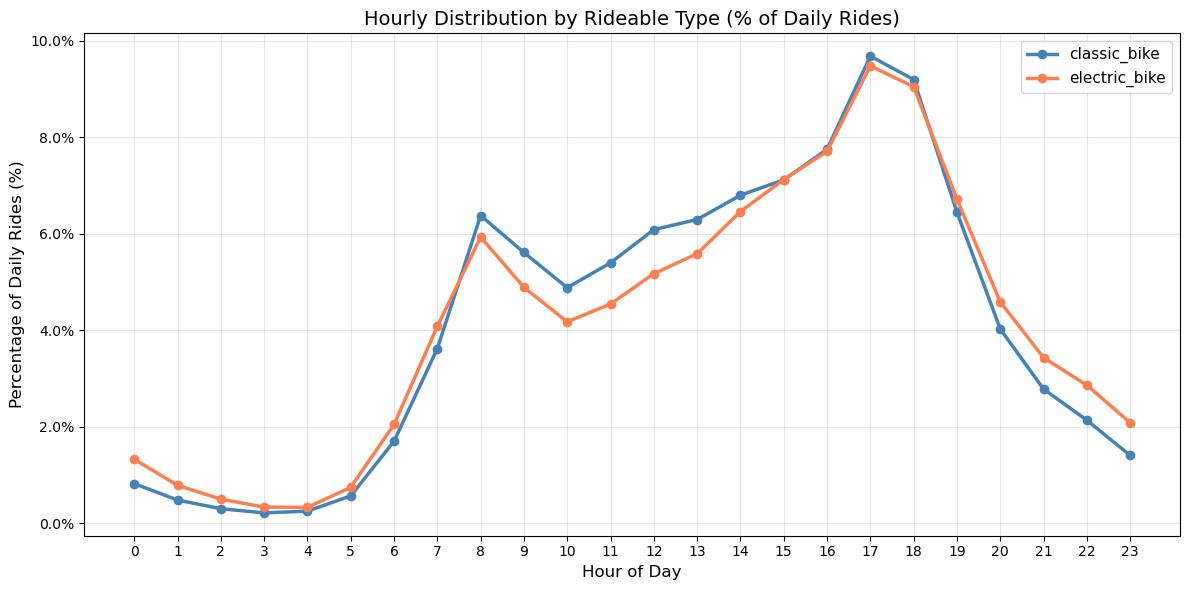

Peak Usage Hours:
-------------------------
classic_bike: 17:00 (9.68%)
electric_bike: 17:00 (9.48%)


In [10]:
# hourly distribution of rideable type

# create percentage data for line chart
df_clean['hour'] = df_clean['started_at'].dt.hour
hourly_counts = pd.crosstab(df_clean['hour'], df_clean['rideable_type'])
hourly_percentages = hourly_counts.div(hourly_counts.sum(axis=0), axis=1) * 100

# create line chart
plt.figure(figsize=(12, 6))

# plot line for each rideable type
colors = ['steelblue', 'coral', 'lightgreen', 'gold']
for i, rideable_type in enumerate(hourly_percentages.columns):
    plt.plot(hourly_percentages.index, 
             hourly_percentages[rideable_type], 
             marker='o', 
             linewidth=2.5,
             markersize=6,
             color=colors[i % len(colors)],
             label=rideable_type)

# visual aesthetics
plt.title('Hourly Distribution by Rideable Type (% of Daily Rides)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Percentage of Daily Rides (%)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# format y-axis to show percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}%'))

#visual aesthetics
plt.tight_layout()
plt.show()

# print peak information
print("Peak Usage Hours:")
print("-" * 25)
for rideable_type in hourly_percentages.columns:
    peak_hour = hourly_percentages[rideable_type].idxmax()
    peak_percentage = hourly_percentages[rideable_type].max()
    print(f"{rideable_type}: {peak_hour}:00 ({peak_percentage:.2f}%)")

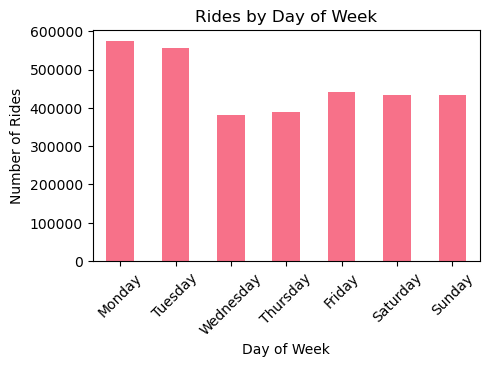

In [11]:
# rides by day of the week

plt.figure(figsize=(5, 3))
df_clean['day_of_week'] = df_clean['started_at'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_clean['day_of_week'].value_counts()[day_order].plot(kind='bar')
plt.title('Rides by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

In [12]:
# confirming that this might be because of days of the week counts
from collections import Counter

# named range
april_2024 = pd.date_range(start='2024-04-01', end='2024-04-30', freq='D')

# days of the week names
day_names = april_2024.day_name()

# instances of days
day_counts = Counter(day_names)

# results
print("Number of days by day of the week in April 2024:")
print("-" * 45)
for day, count in day_counts.items():
    print(f"{day}: {count}")


Number of days by day of the week in April 2024:
---------------------------------------------
Monday: 5
Tuesday: 5
Wednesday: 4
Thursday: 4
Friday: 4
Saturday: 4
Sunday: 4


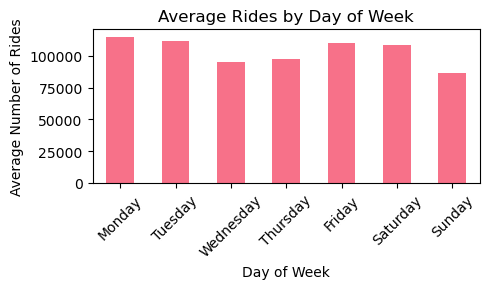

In [13]:
# average rides by day of the week
plt.figure(figsize=(5, 3))

# create day of week and date columns
df_clean['day_of_week'] = df_clean['started_at'].dt.day_name()
df_clean['date'] = df_clean['started_at'].dt.date

# group by date and day of week
# calculate daily totals
daily_totals = df_clean.groupby(['date', 'day_of_week']).size().reset_index(name='rides')

# average rides per day of week
avg_by_day = daily_totals.groupby('day_of_week')['rides'].mean()

# reorder by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_day_ordered = avg_by_day.reindex(day_order)

# plot
avg_by_day_ordered.plot(kind='bar')
plt.title('Average Rides by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


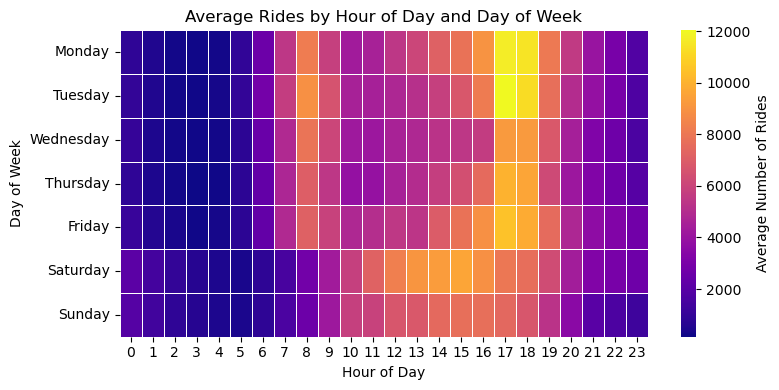

In [14]:
# average rides by hours of the day and day of the week 
# this visual shows the heatmap for every hour of the week. 
# next visual shows the heatmap for every day of the week. 

# create hour, day of week, and date columns
df_clean['hour'] = df_clean['started_at'].dt.hour
df_clean['day_of_week'] = df_clean['started_at'].dt.day_name()
df_clean['date'] = df_clean['started_at'].dt.date

# group by date, day of week, and hour to get daily totals for each hour
hourly_daily_totals = df_clean.groupby(['date', 'day_of_week', 'hour']).size().reset_index(name='rides')

# calculate average rides per hour per day of week
hourly_daily_avg = hourly_daily_totals.groupby(['day_of_week', 'hour'])['rides'].mean().unstack(fill_value=0)

# reorder days to start with Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_daily_avg = hourly_daily_avg.reindex(day_order)

# create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(hourly_daily_avg, 
            cmap='plasma',  # or 'viridis', 'plasma', 'Blues', 'Reds', 'colorblind'
            annot=False,
            fmt='.1f',
            cbar_kws={'label': 'Average Number of Rides'},
            linewidths=0.5)
plt.title('Average Rides by Hour of Day and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

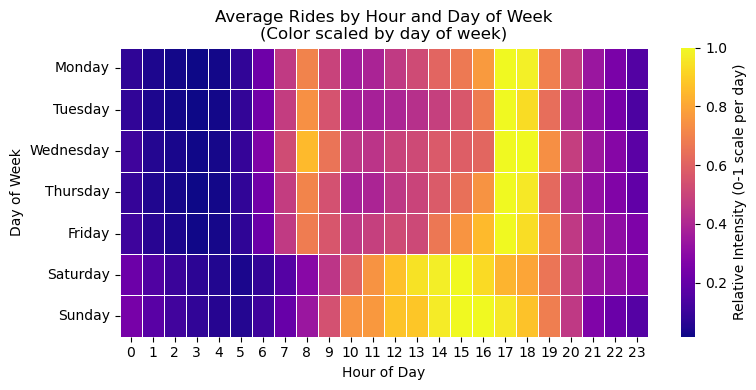

In [15]:
# average rides by hours of the day and day of the week 
# create hour, day of week, and date columns
df_clean['hour'] = df_clean['started_at'].dt.hour
df_clean['day_of_week'] = df_clean['started_at'].dt.day_name()
df_clean['date'] = df_clean['started_at'].dt.date

# group by date, day of week, and hour for daily totals by hour
hourly_daily_totals = df_clean.groupby(['date', 'day_of_week', 'hour']).size().reset_index(name='rides')

# average rides per hour per day of week
hourly_daily_avg = hourly_daily_totals.groupby(['day_of_week', 'hour'])['rides'].mean().unstack(fill_value=0)

# start the week on Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_daily_avg = hourly_daily_avg.reindex(day_order)

# normalize by day of week (each row scales from 0-1)
hourly_daily_normalized = hourly_daily_avg.div(hourly_daily_avg.max(axis=1), axis=0)

# create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(hourly_daily_normalized, 
            cmap='plasma',
            annot=False,
            fmt='.2f',
            cbar_kws={'label': 'Relative Intensity (0-1 scale per day)'},
            linewidths=0.5)
plt.title('Average Rides by Hour and Day of Week\n(Color scaled by day of week)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()



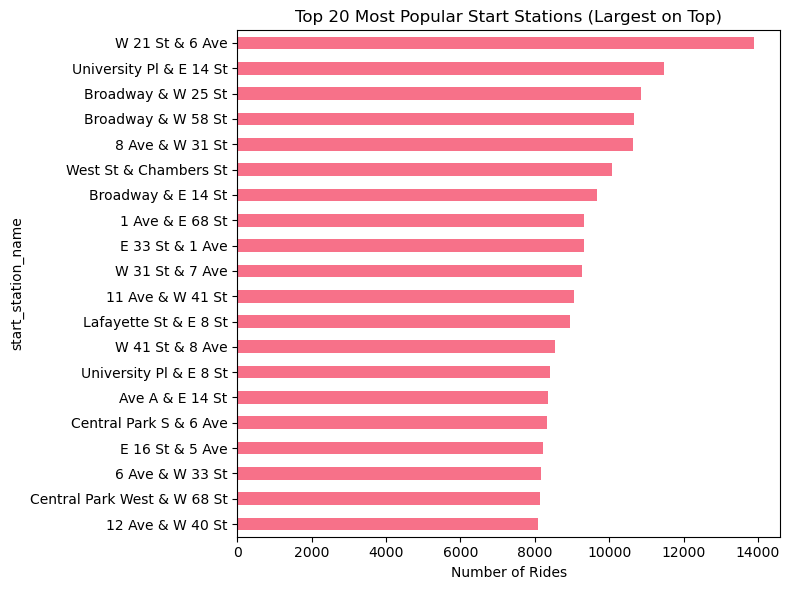

In [16]:
# top 20 start stations 
plt.figure(figsize=(8, 6))
top_start_stations = df_clean['start_station_name'].value_counts().head(20)
top_start_stations.sort_values().plot(kind='barh')  # Added sort_values()
plt.title('Top 20 Most Popular Start Stations (Largest on Top)')
plt.xlabel('Number of Rides')
plt.tight_layout()
plt.show()

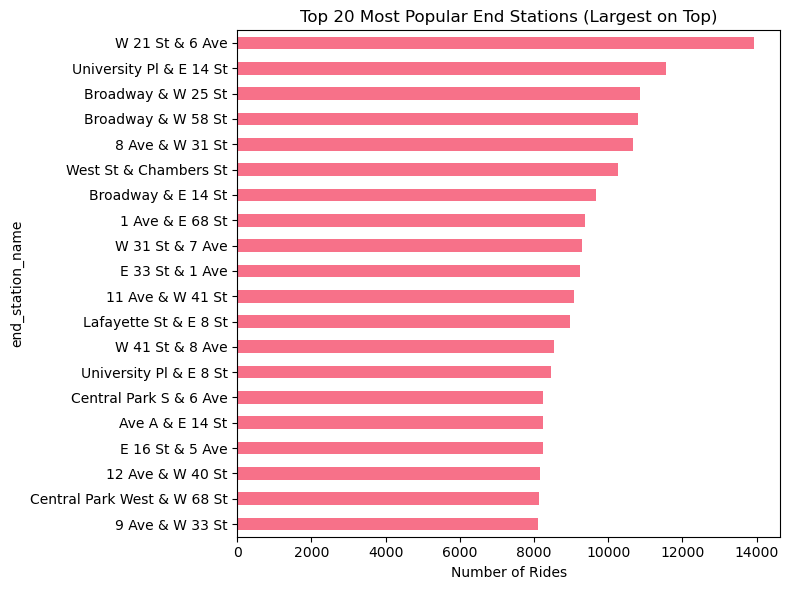

In [17]:
# top 20 end stations 
plt.figure(figsize=(8, 6))
top_start_stations = df_clean['end_station_name'].value_counts().head(20)
top_start_stations.sort_values().plot(kind='barh')  # Added sort_values()
plt.title('Top 20 Most Popular End Stations (Largest on Top)')
plt.xlabel('Number of Rides')
plt.tight_layout()
plt.show()

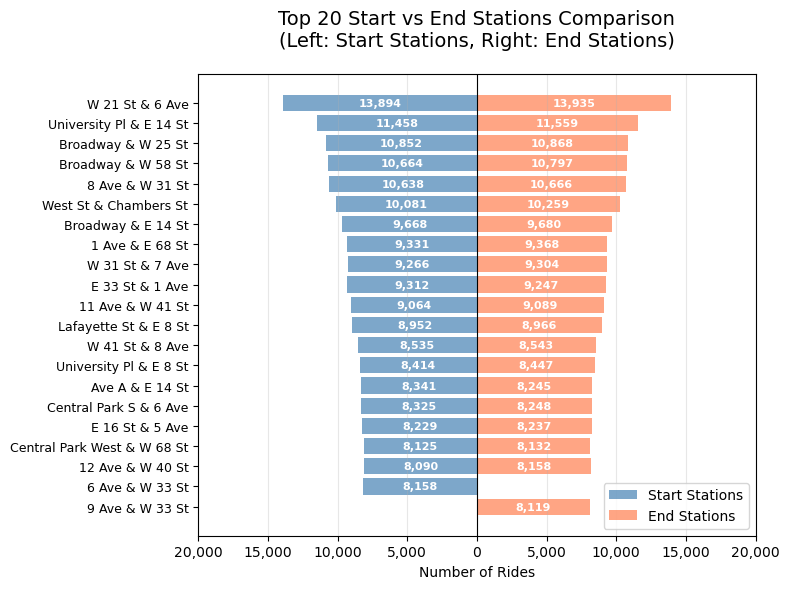

Station Analysis Summary:
----------------------------------------
Total unique stations in top 20 lists: 21
Stations in both top 20 lists: 19
Start-only stations: 1
End-only stations: 1


In [18]:
# get top 20 start and end stations
top_start_stations = df_clean['start_station_name'].value_counts().head(20)
top_end_stations = df_clean['end_station_name'].value_counts().head(20)

# combine all unique stations from both lists
all_stations = set(top_start_stations.index) | set(top_end_stations.index)

# create dataframe with start and end counts for all stations
station_comparison = pd.DataFrame({
    'start_count': [top_start_stations.get(station, 0) for station in all_stations],
    'end_count': [top_end_stations.get(station, 0) for station in all_stations]
}, index=list(all_stations))

# sort by total usage (start + end)
station_comparison['total'] = station_comparison['start_count'] + station_comparison['end_count']
station_comparison = station_comparison.sort_values('total', ascending=True)

# create the diverging bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# plot start stations (negative/left side)
start_bars = ax.barh(range(len(station_comparison)), 
                     -station_comparison['start_count'], 
                     color='steelblue', 
                     alpha=0.7, 
                     label='Start Stations')

# plot end stations (positive/right side)
end_bars = ax.barh(range(len(station_comparison)), 
                   station_comparison['end_count'], 
                   color='coral', 
                   alpha=0.7, 
                   label='End Stations')

# add count labels inside bars
for i, (start_count, end_count) in enumerate(zip(station_comparison['start_count'], station_comparison['end_count'])):
    # add start count labels (left side)
    if start_count > 0:
        ax.text(-start_count/2, i, f'{start_count:,}', 
                ha='center', va='center', color='white', fontweight='bold', fontsize=8)
    
    # add end count labels (right side)
    if end_count > 0:
        ax.text(end_count/2, i, f'{end_count:,}', 
                ha='center', va='center', color='white', fontweight='bold', fontsize=8)

# customize the chart
ax.set_yticks(range(len(station_comparison)))
ax.set_yticklabels(station_comparison.index, fontsize=9)
ax.set_xlabel('Number of Rides')
ax.set_title('Top 20 Start vs End Stations Comparison\n(Left: Start Stations, Right: End Stations)', 
             fontsize=14, pad=20)

# add vertical line at zero
ax.axvline(x=0, color='black', linewidth=0.8)

# format x-axis to show absolute values
ax.set_xlim(-max(station_comparison['start_count']) * 1.1, 
            max(station_comparison['end_count']) * 1.1)

# create custom x-tick labels (absolute values)
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([f'{abs(int(tick)):,}' for tick in ticks])

# add legend
ax.legend(loc='lower right')

# add grid for better readability
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# print summary statistics
print("Station Analysis Summary:")
print("-" * 40)
print(f"Total unique stations in top 20 lists: {len(station_comparison)}")
print(f"Stations in both top 20 lists: {len(station_comparison[(station_comparison['start_count'] > 0) & (station_comparison['end_count'] > 0)])}")
print(f"Start-only stations: {len(station_comparison[(station_comparison['start_count'] > 0) & (station_comparison['end_count'] == 0)])}")
print(f"End-only stations: {len(station_comparison[(station_comparison['start_count'] == 0) & (station_comparison['end_count'] > 0)])}")

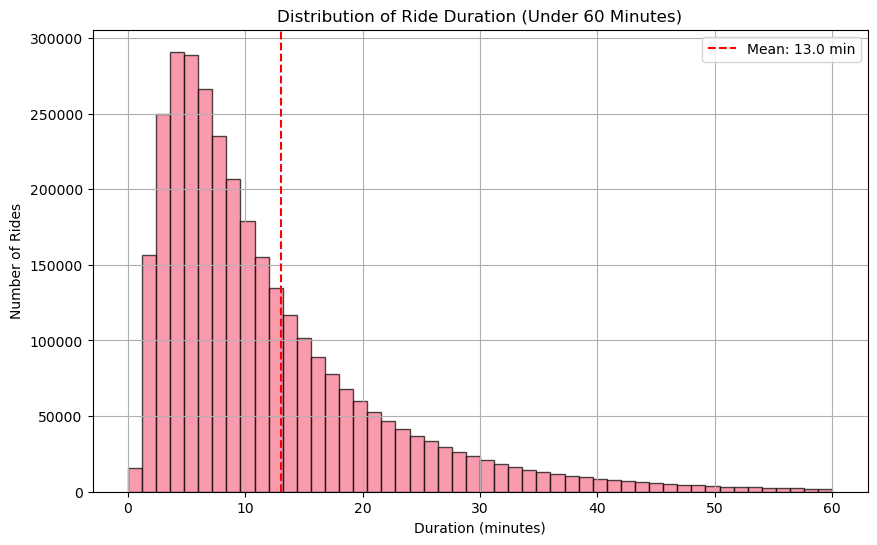

Mean duration: 13.01 minutes
Median duration: 8.97 minutes
Rides over 60 minutes: 36,628


In [19]:
# Calculate ride duration in minutes
df_clean['duration_minutes'] = (df_clean['ended_at'] - df_clean['started_at']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
df_clean['duration_minutes'].hist(bins=50, range=(0, 60), edgecolor='black', alpha=0.7)
plt.title('Distribution of Ride Duration (Under 60 Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Rides')

# Add some summary stats
mean_duration = df_clean['duration_minutes'].mean()
plt.axvline(mean_duration, color='red', linestyle='--', label=f'Mean: {mean_duration:.1f} min')
plt.legend()
plt.show()

# Print some summary statistics
print(f"Mean duration: {df_clean['duration_minutes'].mean():.2f} minutes")
print(f"Median duration: {df_clean['duration_minutes'].median():.2f} minutes")
print(f"Rides over 60 minutes: {(df_clean['duration_minutes'] > 60).sum():,}")

In [20]:
df_clean.to_parquet('../data/processed/cleaned_citibike_data_with_features.parquet')